In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
# importing data from MNIST data set into a tuple 
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# shape of train and test data 
print('shape of X_train =',X_train.shape)
print('shape of X_test =',X_test.shape)
print('shape of y_train =',y_train.shape)
print('shape of y_test =',y_test.shape)


shape of X_train = (60000, 28, 28)
shape of X_test = (10000, 28, 28)
shape of y_train = (60000,)
shape of y_test = (10000,)


In [4]:
# reshaping data for saving  into dataframe for performing SVM 
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
# as y class should tell us what number our X class is representing hence converting it into categorical data type 
nb_classes = 10 #one hot encoding

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
# saving train and test data into a DataFrame 
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [7]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576471,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# unique numbers represented by y train 
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Text(0.5, 1.0, 'Digit 3')

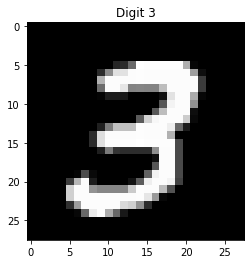

In [9]:
# visualising few images from data set   
three = X_train.iloc[7, :]
three = three.values.reshape(28,28)
plt.imshow(three,cmap='gray')
plt.title("Digit 3")

In [43]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=20)

In [66]:
print(X_train[1][:,:,0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

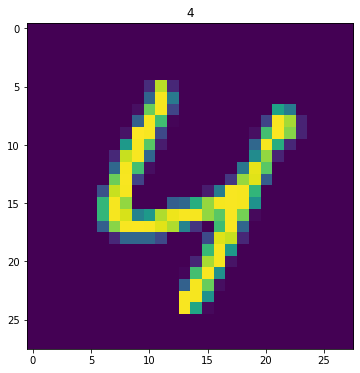

In [67]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[1][:,:,0])
plt.title(Y_train[1].argmax());

In [68]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [69]:
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)


x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation = 'softmax',name='fc2')(x)

model = Model(inputs = input,outputs = x,name='Predict')

In [70]:
model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        256 

In [54]:
from keras.preprocessing.image import ImageDataGenerator

In [71]:
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally 
    height_shift_range=0.2,# randomly shift images vertically 

    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)

In [72]:
# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [73]:
import math
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [75]:
history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
                          epochs=10,callbacks=callbacks_list,verbose=1)

Epoch 1/10
1688/1688 [==============================] - 182s 108ms/step - loss: 0.2939 - accuracy: 0.9111 - val_loss: 0.0692 - val_accuracy: 0.9800
Epoch 2/10
1688/1688 [==============================] - 168s 99ms/step - loss: 0.1140 - accuracy: 0.9703 - val_loss: 0.0693 - val_accuracy: 0.9808
Epoch 3/10
1688/1688 [==============================] - 167s 99ms/step - loss: 0.0664 - accuracy: 0.9831 - val_loss: 0.0445 - val_accuracy: 0.9865
Epoch 4/10
1688/1688 [==============================] - 168s 99ms/step - loss: 0.0536 - accuracy: 0.9866 - val_loss: 0.0340 - val_accuracy: 0.9898
Epoch 5/10
1688/1688 [==============================] - 167s 99ms/step - loss: 0.0498 - accuracy: 0.9874 - val_loss: 0.0349 - val_accuracy: 0.9898
Epoch 6/10
1688/1688 [==============================] - 168s 100ms/step - loss: 0.0353 - accuracy: 0.9909 - val_loss: 0.0407 - val_accuracy: 0.9903
Epoch 7/10
1688/1688 [==============================] - 169s 100ms/step - loss: 0.0336 - accuracy: 0.9909 - val_loss

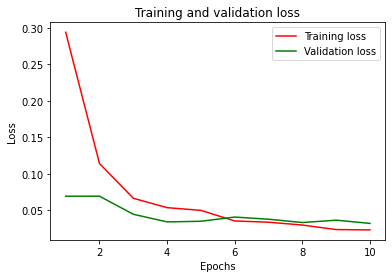

In [76]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

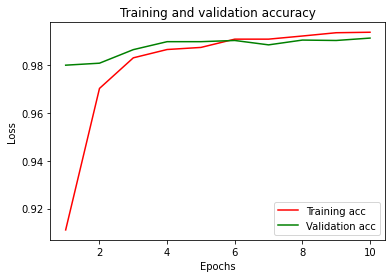

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
score = model.evaluate(X_valid,Y_valid)
print('Test accuracy:', score[0])

188/188 [==============================] - 4s 23ms/step - loss: 0.0320 - accuracy: 0.9913
Test accuracy: 0.03200384974479675


In [99]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

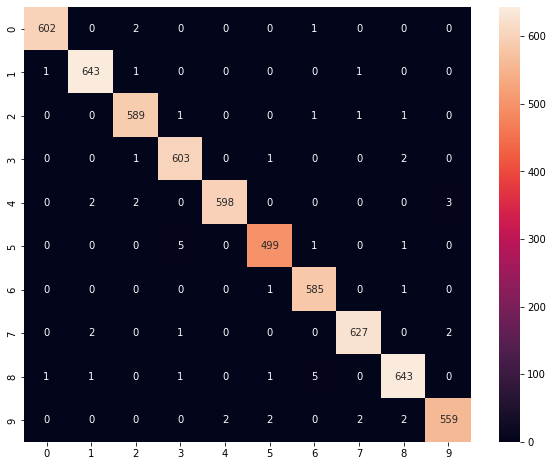

In [100]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [79]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

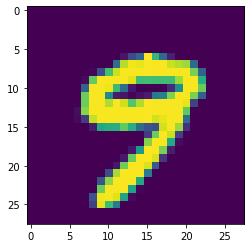

In [80]:
plt.imshow(X_train[10][:,:,0]);

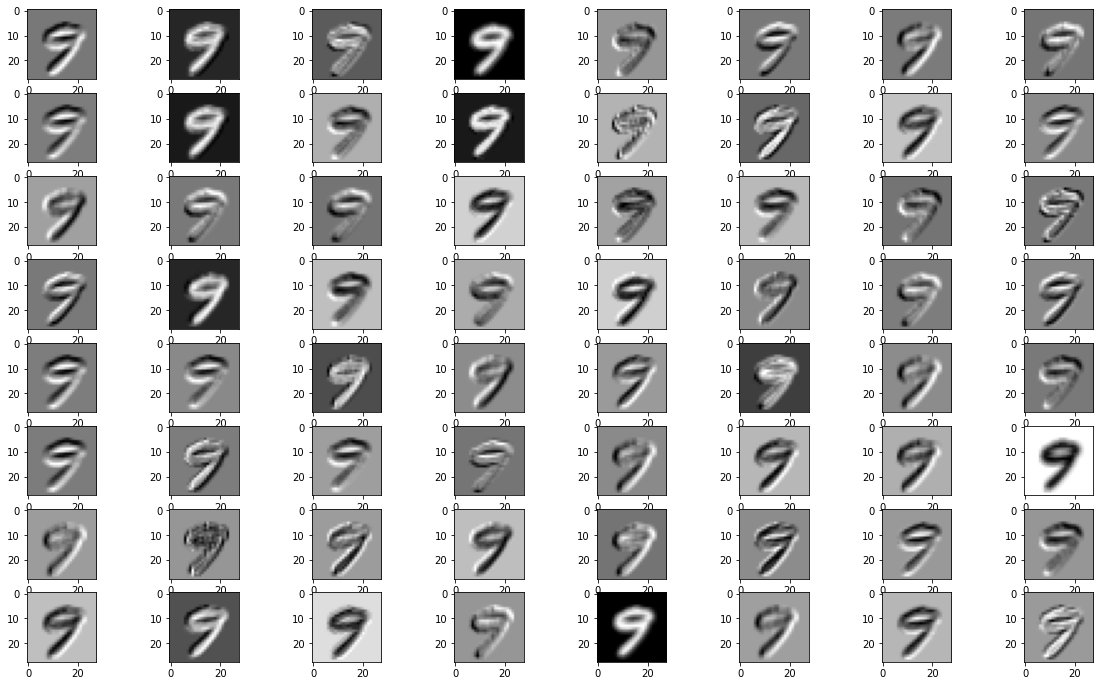

In [81]:
display_activation(activations, 8, 8, 1)

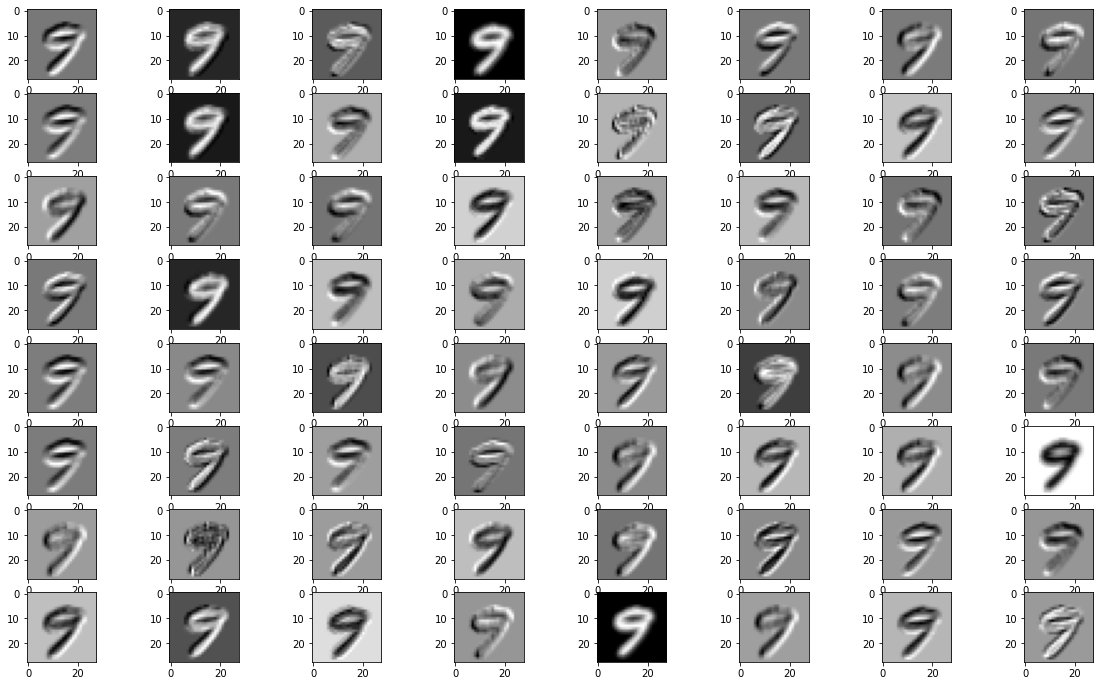

In [82]:
display_activation(activations, 8, 8, 2)

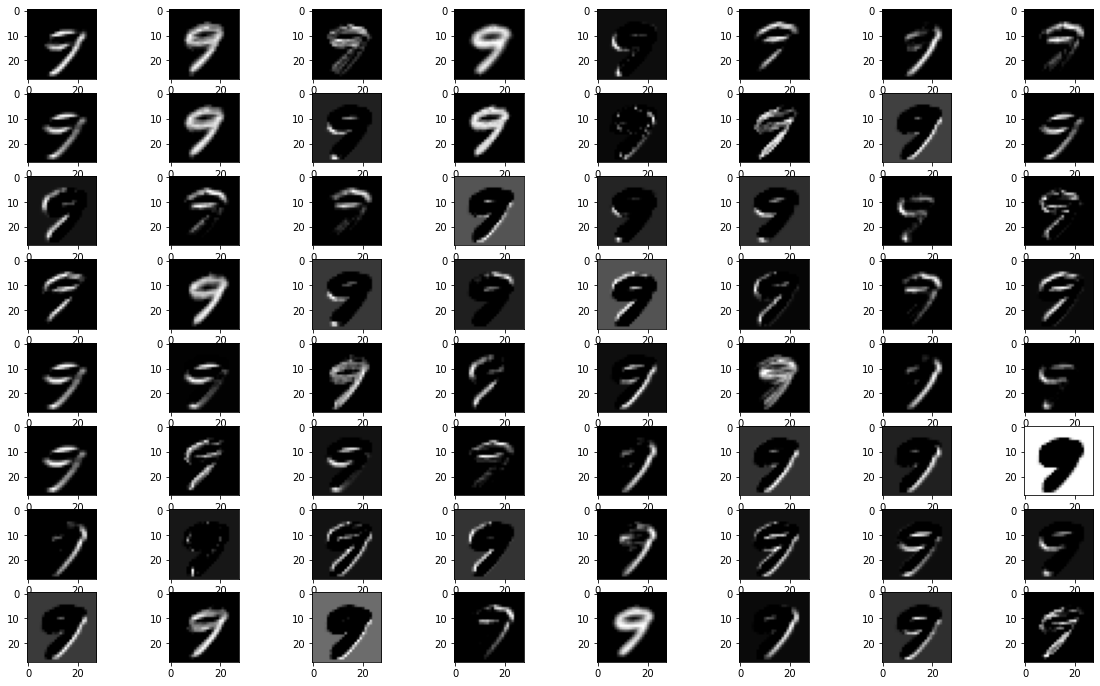

In [83]:
display_activation(activations, 8, 8, 3)

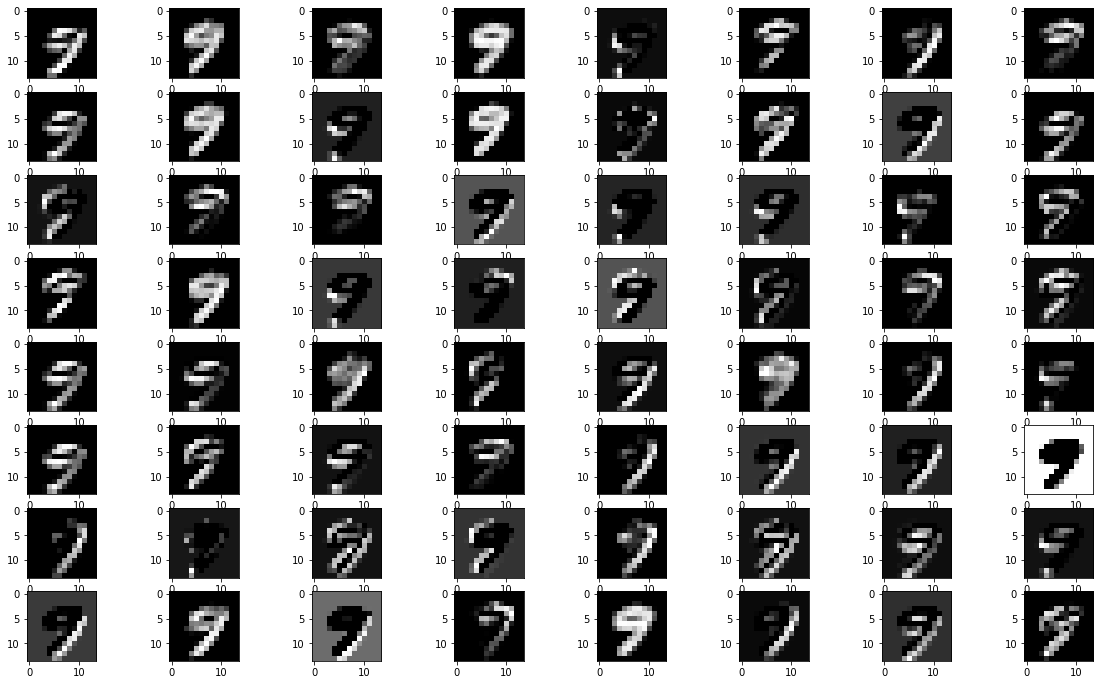

In [84]:
display_activation(activations, 8, 8, 4)

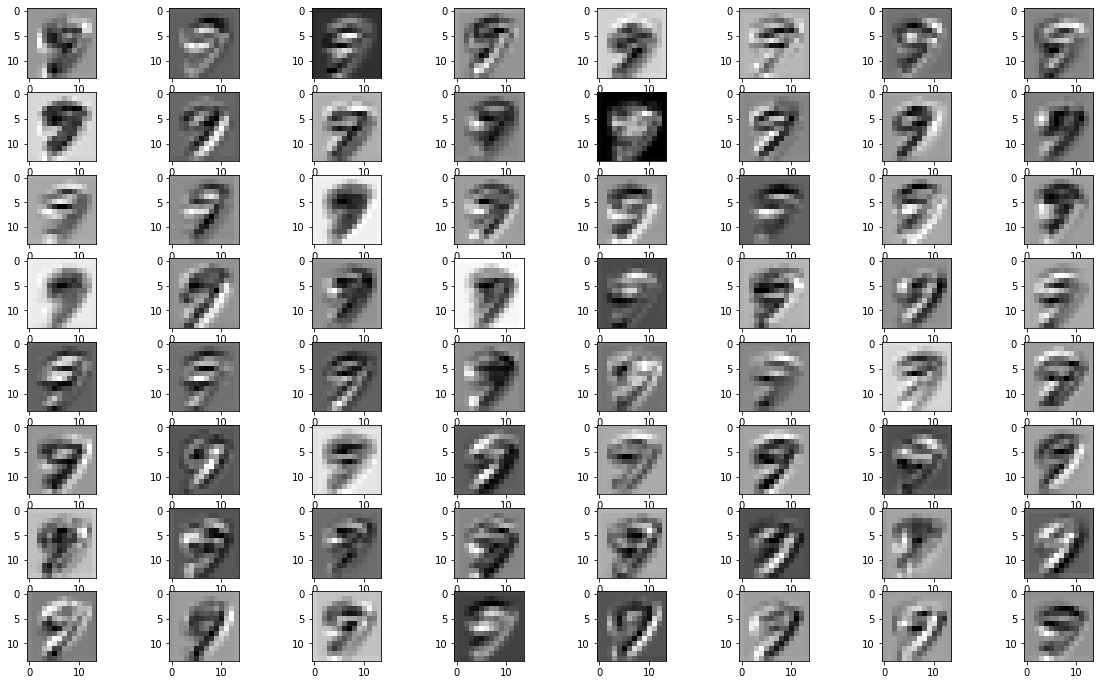

In [85]:
display_activation(activations, 8, 8, 5)

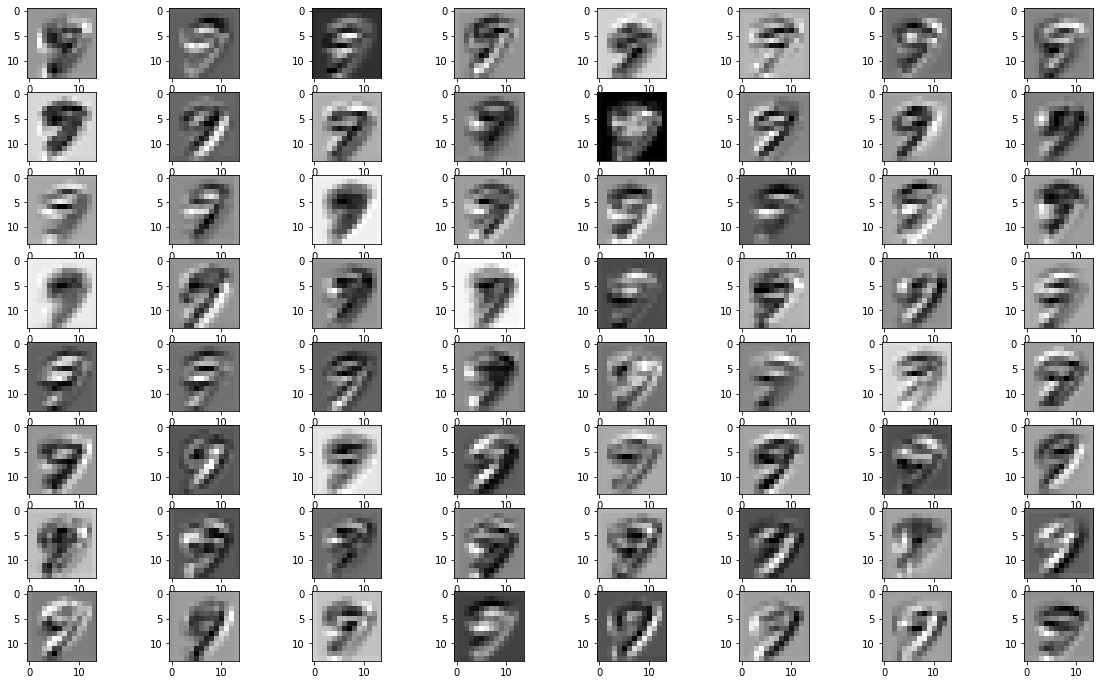

In [86]:
display_activation(activations, 8, 8, 6)

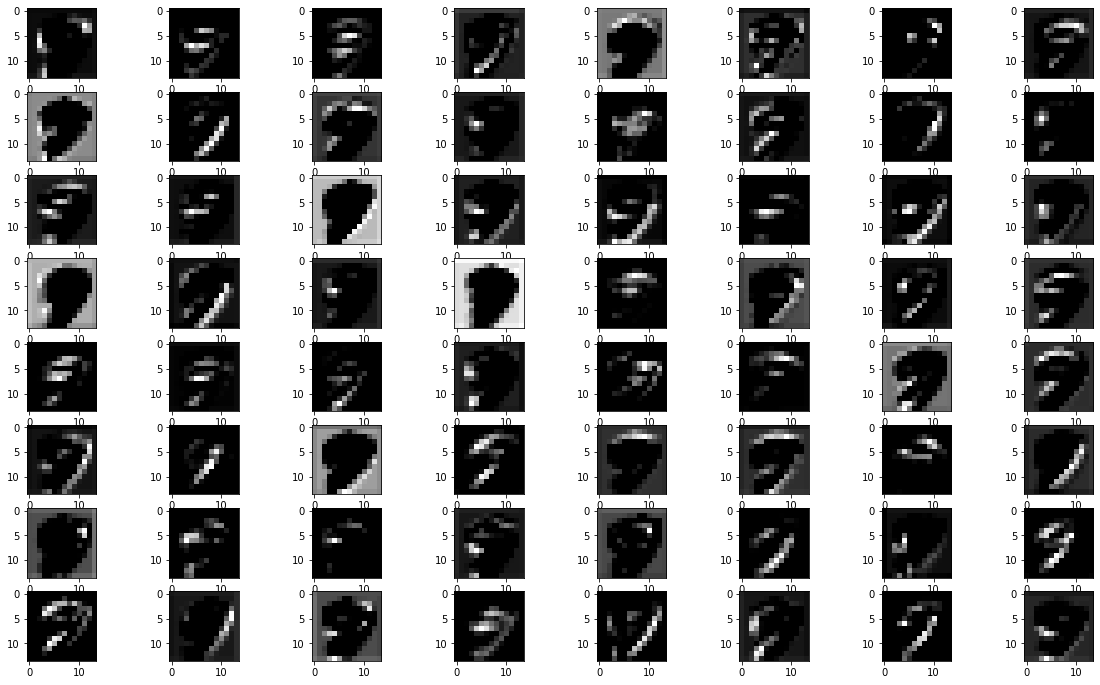

In [87]:
display_activation(activations, 8, 8, 7)

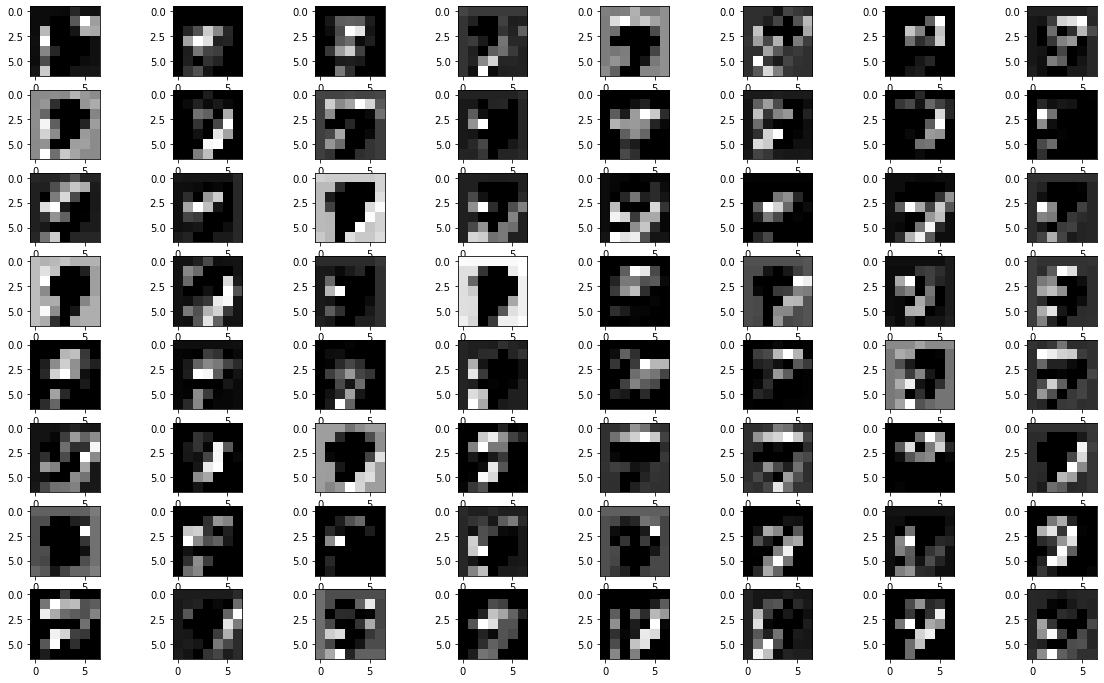

In [88]:
display_activation(activations, 8, 8, 8)